In [1]:
import requests
import numpy as np
from PIL import Image
import pandas as pd
%matplotlib inline
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import json
from sklearn.model_selection import GridSearchCV

In [2]:
# response = requests.get('https://public.opendatasoft.com/api/records/1.0/search/?dataset=the-tate-collection&q=&facet=artist&facet=medium&facet=year&facet=acquisitionyear&facet=dimensions')
# print(response.status_code)
# print(response.json())
# df = pd.json_normalize(response.json())

In [3]:
# im = Image.open(requests.get("https://upload.wikimedia.org/wikipedia/en/thumb/3/33/Patrick_Star.svg/1200px-Patrick_Star.svg.png", stream=True).raw)
# im

In [36]:
# Local file
df = pd.read_csv('the-tate-collection.csv',sep = ";")
df

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,20400,P77527,"Charlton, Alan",artist,891,[no title],1991,Screenprint on paper,Purchased 1992,1991.0,1992.0,image: 362 x 362 mm,362.0,362.0,NaN,mm,date inscribed,© Alan Charlton,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/charlton-n...
1,20618,P77580,"Artschwager, Richard",artist,669,Interior,1972,Screenprint on paper,Purchased 1992,1972.0,1992.0,image: 715 x 1043 mm,715.0,1043.0,NaN,mm,date inscribed,"© ARS, NY and DACS, London 2014",https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/artschwage...
2,20830,P77612,"Marden, Brice",artist,1578,[no title],1971,Etching and aquatint on paper,Purchased 1993,1971.0,1993.0,image: 370 x 603 mm,370.0,603.0,NaN,mm,date inscribed,"© ARS, NY and DACS, London 2014",https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/marden-no-...
3,21086,P77680,"Francis, Mark",artist,2311,Untitled,1994,Monotype on paper,Purchased 1994,1994.0,1994.0,image: 582 x 584 mm,582.0,584.0,NaN,mm,NaN,© Mark Francis,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/francis-un...
4,21163,P77699,"Self, Colin",artist,1922,Power and Beauty No. 4,1968,Screenprint on paper,Purchased 1994,1968.0,1994.0,image: 1044 x 681 mm,1044.0,681.0,NaN,mm,NaN,"© Colin Self. All Rights Reserved, DACS 2014",https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/self-power...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69196,23515,T11010,"Seabrooke, Elliott",artist,1918,Landscape with Castle under a Stormy Sky,date not known,"Graphite, ink and watercolour on paper",Purchased as part of the Oppé Collection with ...,NaN,1997.0,support: 86 x 118 mm,86.0,118.0,NaN,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/seabrooke-...
69197,25332,T11028,"Gainsborough, Thomas",after,199,[title not known],1819,Etching on paper,Purchased as part of the Oppé Collection with ...,1819.0,1997.0,image: 187 x 257 mm,187.0,257.0,NaN,mm,NaN,NaN,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/gainsborou...
69198,25349,T11045,"Gainsborough, Thomas",after,199,[title not known],1819,Etching and watercolour on paper,Purchased as part of the Oppé Collection with ...,1819.0,1997.0,image: 186 x 257 mm,186.0,257.0,NaN,mm,NaN,NaN,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/gainsborou...
69199,25445,T11089,"Flaxman, John",after,186,The Statue of Four Metals,1807,Etching on paper,Purchased as part of the Oppé Collection with ...,1807.0,1997.0,image: 132 x 191 mm,132.0,191.0,NaN,mm,NaN,NaN,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/flaxman-th...


In [7]:
# dffields['year'].value_counts()
df['year'].isna().sum()

5397

In [8]:
df['acquisitionYear'].isna().sum()

45

In [9]:
# dropping NAs
# train = dffields.dropna(how='any',axis=0)
# train = dffields
# train.dropna(subset = ['year', 'acquisitionyear'], inplace = True)
# train.drop(train['acquisitionyear'].isna().index, inplace = True)
# train.drop(train['year'].isna().index, inplace = True)

In [10]:
df['year'] = pd.to_numeric(df['year'])
df['acquisitionYear'] = pd.to_numeric(df['acquisitionYear'])

Text(0.5, 0, 'Year')

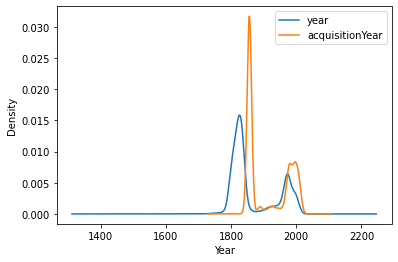

In [11]:
ax = df[['year', 'acquisitionYear']].plot.kde()
ax.set_xlabel("Year")

#### Year of Artwork Creation versus Year Acquired by Tate Gallery

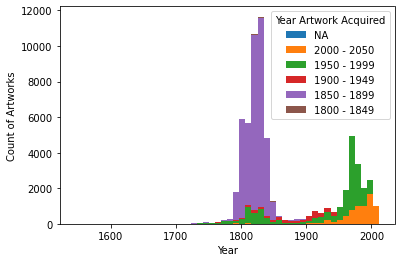

In [12]:
def round_sf(number, significant):
    return round(number, significant - len(str(number)))

min_ayear = int(df['acquisitionYear'].min());
max_ayear = int(df['acquisitionYear'].max());
diff = round_sf(max_ayear, 2) - round_sf(min_ayear, 2)

temp_data = []
temp_label = []

temp_data.append(df['year'][df['acquisitionYear'].isna()])
temp_label.append("NA")
for x in range(0, diff + 50, 50):
    temp_data.append(df['year'][(df['acquisitionYear'] >= round_sf(max_ayear, 2) - x) 
                      & (df['acquisitionYear'] < round_sf(max_ayear, 2) - x + 50)])
    if x != 0:
        temp_label.append(str(round_sf(max_ayear, 2) - x) + ' - ' + 
                             str(round_sf(max_ayear, 2) - x + 50 - 1))
    else:
        temp_label.append(str(round_sf(max_ayear, 2) - x) + ' - ' + 
                             str(round_sf(max_ayear, 2) - x + 50))
    

plt.hist(temp_data, bins=50, stacked=True)
plt.legend(temp_label, title = "Year Artwork Acquired")
plt.xlabel("Year")  
plt.ylabel("Count of Artworks")
plt.show()

#### Pre-Tate Gallery Artwork Acqusition

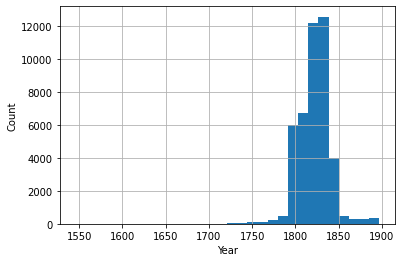

In [13]:
df['year'][df['year'] <= 1897].hist(
        bins=30);
plt.xlabel("Year")  
plt.ylabel("Count")
plt.show()

In [14]:
df['artist'][df['year'] <= 1897].value_counts(ascending=False)

Turner, Joseph Mallord William    39046
Daniell, William                    612
Constable, John                     188
Blake, William                      175
Flaxman, John                       151
                                  ...  
Allom, Thomas                         1
Frye, Thomas                          1
Greville, Lady Louisa                 1
Walton, Edward Arthur                 1
Strutt, Arthur John                   1
Name: artist, Length: 748, dtype: int64

In [15]:
df['artist'][df['year'] <= 1897].value_counts(ascending=False)[0] / df['artist'][df['year'] <= 1897].count()

0.8892077156065679

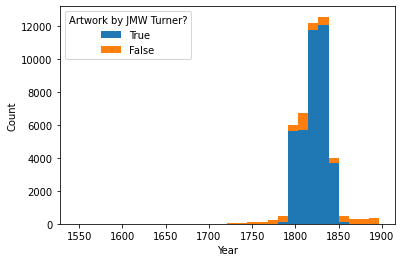

In [16]:
plt.hist([df['year'][(df['year'] <= 1897) & (df['artist'] == "Turner, Joseph Mallord William")],
         df['year'][(df['year'] <= 1897) & (df['artist'] != "Turner, Joseph Mallord William")]],
          bins=30, stacked=True)
plt.legend(['True', 'False'], title = "Artwork by JMW Turner?")
plt.xlabel("Year")  
plt.ylabel("Count")
plt.show()

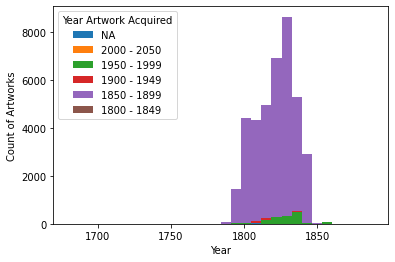

In [17]:
temp_data = []
temp_label = []

temp_data.append(df['year'][(df['acquisitionYear'].isna())
                            & (df['artist'] == "Turner, Joseph Mallord William")])
temp_label.append("NA")
for x in range(0, diff + 50, 50):
    temp_data.append(df['year'][((df['acquisitionYear'] >= round_sf(max_ayear, 2) - x) 
                      & (df['acquisitionYear'] < round_sf(max_ayear, 2) - x + 50))
                        & (df['artist'] == "Turner, Joseph Mallord William")])
    if x != 0:
        temp_label.append(str(round_sf(max_ayear, 2) - x) + ' - ' + 
                             str(round_sf(max_ayear, 2) - x + 50 - 1))
    else:
        temp_label.append(str(round_sf(max_ayear, 2) - x) + ' - ' + 
                             str(round_sf(max_ayear, 2) - x + 50))
    

plt.hist(temp_data, bins=30, stacked=True)
plt.legend(temp_label, title = "Year Artwork Acquired")
plt.xlabel("Year")  
plt.ylabel("Count of Artworks")
plt.show()

#### Aspect Ratio through Time

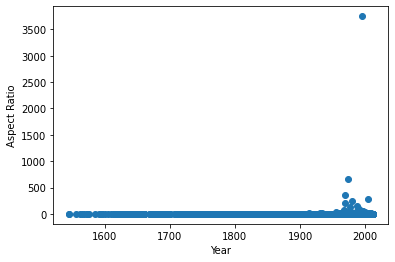

In [18]:
x = df['year']
y = df['height'] / df['width']
plt.xlabel("Year")  
plt.ylabel("Aspect Ratio")
plt.scatter(x, y);

In [19]:
df[df['height'] / df['width'] > 3000]

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
40102,21561,T07064,"Balka, Miroslaw",artist,2360,[diameter]1 x 3750,1995,Steel,Presented by the Patrons of New Art through th...,1995.0,1996.0,unconfirmed: 10 x 37500 x 10 mm,10.0,37500.0,10.0,mm,NaN,© Miroslaw Balka,https://data.opendatasoft.com/api/datasets/1.0...,http://www.tate.org.uk/art/artworks/balka-diam...


c:\users\colo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


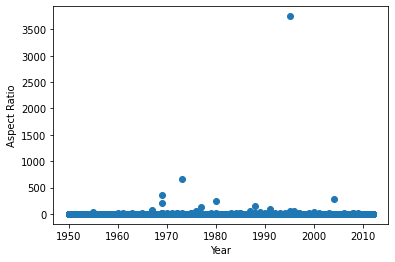

In [20]:
temp_df = df[['height', 'width', 'year']]
temp_is_m = temp_df[temp_df['year'] >= 1950]
temp_not_m = temp_df[temp_df['year'] < 1950]

temp_is_m['aspect_ratio'] = temp_is_m['height'] / temp_is_m['width']
plt.xlabel("Year")  
plt.ylabel("Aspect Ratio")
plt.scatter(temp_is_m['year'], temp_is_m['aspect_ratio']);

c:\users\colo\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


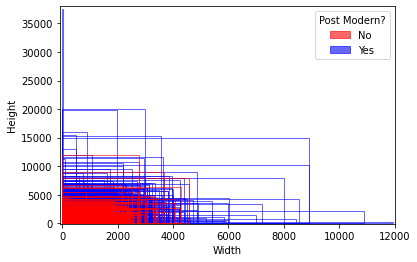

In [21]:
fig, ax = plt.subplots()
temp_is_m = temp_df[temp_df['year'] >= 1950]
temp_not_m = temp_df[temp_df['year'] < 1950]

# Post Modern
for x in range(temp_is_m.shape[0]):
    rect = patches.Rectangle((0, 0), temp_is_m['width'].iloc[x], temp_is_m['height'].iloc[x], 
                         linewidth=1, edgecolor='b', facecolor='none', alpha = 0.6)
    ax.add_patch(rect)

# Pre Modern
for x in range(temp_not_m.shape[0]):
    rect = patches.Rectangle((0, 0), temp_not_m['width'].iloc[x], temp_not_m['height'].iloc[x], 
                         linewidth=1, edgecolor='r', facecolor='none', alpha = 0.6)
    ax.add_patch(rect)
    
ax.set_ylim(-100, round_sf(int(temp_df['height'].max()), 2))
ax.set_xlim(-100, round_sf(int(temp_df['width'].max()), 2))
plt.legend(["No", "Yes"], title = "Post Modern?")
leg = ax.get_legend()
leg.legendHandles[0].set_color('r')
leg.legendHandles[1].set_color('b')
plt.xlabel("Width")  
plt.ylabel("Height")
plt.show()

### Using Aspect Ratio to Predict Year of Artwork Creation

In [136]:
import sklearn
import math
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [137]:
# fill missing data with mean
temp_df = df[['height', 'width', 'year']]
temp_df = temp_df.dropna()
# temp_df['height'] = temp_df.loc[:, 'height'].fillna(temp_df['height'].mean())
# temp_df['width'] = temp_df.loc[:, 'width'].fillna(temp_df['width'].mean())
# temp_df['year'] = temp_df.loc[:, 'year'].fillna(temp_df['year'].mean())
temp_df.isna().sum()
# temp_df

height    0
width     0
year      0
dtype: int64

In [138]:
# remove deicmal places from 'year'
temp_df['year'] = temp_df.loc[:, 'year'].astype(int)
temp_df['year']

0        1991
1        1972
2        1971
3        1994
4        1968
         ... 
69194    1839
69197    1819
69198    1819
69199    1807
69200    1807
Name: year, Length: 61657, dtype: int32

In [139]:
X_train, X_test, y_train, y_test = train_test_split(temp_df['height'] / temp_df['width'], temp_df['year'], test_size=0.3, random_state=0)
# X = temp_df.loc[:,'height'] / temp_df.loc[:, 'width']
# Y = temp_df.loc[:, 'year']
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# temp_df

In [140]:
# Feature Scaling
sc = StandardScaler()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
# X_train[6]

In [141]:
# Model

# artworks_ar$century <- cut(artworks_ar$year, breaks = 
#                            c(1500,1550,1600,1650,1700,1750,1800,1850
#                              1900,1950,2000,2050),
#             labels = c("1500-1549", "1550-1600","1600-1649","1650-1699","1700-1749","1750-1799",
#                        "1800-1849","1850-1899","1900-1949", "1950-1999","2000-2050"), 
#                            include.lowest = TRUE)

# sample <- sample.split(artworks_ar$century, SplitRatio=0.7)

# train <- artworks_ar[sample,]
# test  <- artworks_ar[!sample,]
clf = RandomForestClassifier(n_estimators = 500, bootstrap=True, oob_score = True, 
                            random_state = 0)
# clf = RandomForestRegressor(n_estimators = 500)
# min_year = round_sf(temp_df['year'].min(), 2)
# max_year = round_sf(temp_df['year'].max(), 2)

# for num in range(min_year, max_year + 50, 50):
# # #     print(str(num) + ' - ' + str(num + 50 - 1))
#     temp_X = X_train[(temp_df['year'] >= num) & (temp_df['year'] <= num + 50 - 1)]
    
#     temp_Y = y_train[(temp_df['year'] >= num) & (temp_df['year'] <= num + 50 - 1)]
clf.fit(X_train, y_train)
    

y_pred = clf.predict(X_test)

In [142]:
y_pred

array([1874, 1830, 1819, ..., 1822, 1982, 1795])

In [143]:
from sklearn import metrics
# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 26.779435614661043
Mean Squared Error: 3487.7071034706455
Root Mean Squared Error: 59.056812506861945
Accuracy: 0.5457346740188128


In [144]:
y_pred = clf.predict([[0.123], [0.3], [1000]])
y_pred

array([1830, 1969, 1995])

In [145]:
y_pred = clf.predict(X_train)

In [146]:
y_pred

array([1927, 1799, 1983, ..., 1983, 1815, 1810])

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Mean Absolute Error: 8.434069371394147
Mean Squared Error: 1040.0947195254755
Root Mean Squared Error: 32.25049952365816
Accuracy: 0.804119650594314
